In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


In [2]:
data=pd.read_csv('fish.csv')

In [3]:
data


,Bream,242.0,23.2,25.4,30.0,38.4,13.4
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2
...,...,...,...,...,...,...,...
79,Pike,950.0,48.3,51.7,55.1,16.2,11.2
80,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
81,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
82,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [6]:
col_names=['Type','Weight','Length1','Length2','Length3','Height','Width']
data.columns=col_names
data

,Type,Weight,Length1,Length2,Length3,Height,Width
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2
...,...,...,...,...,...,...,...
79,Pike,950.0,48.3,51.7,55.1,16.2,11.2
80,Pike,1250.0,52.0,56.0,59.7,17.9,11.7
81,Pike,1600.0,56.0,60.0,64.0,15.0,9.6
82,Pike,1550.0,56.0,60.0,64.0,15.0,9.6


In [9]:
X=data[['Weight','Length1']]
X
from sklearn.model_selection import train_test_split

In [15]:
import pickle
with open('kmeans.pkl','wb') as f:
    pickle.dump(km,f)

In [13]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(2,9):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)

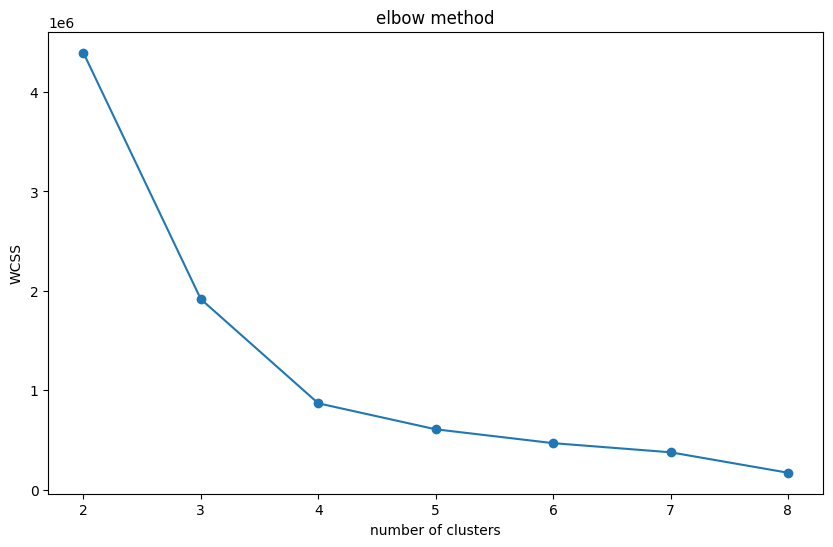

In [14]:
plt.figure(figsize=(10,6))
plt.plot(range(2,9),wcss,marker='o')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [112]:
km=KMeans(n_clusters=4)
km.fit(X)
y_means=km.predict(X)

In [22]:
data['cluster']=y_means
data

,Type,Weight,Length1,Length2,Length3,Height,Width,cluster
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8,3
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1,3
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3,3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1,3
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2,3
...,...,...,...,...,...,...,...,...
79,Pike,950.0,48.3,51.7,55.1,16.2,11.2,2
80,Pike,1250.0,52.0,56.0,59.7,17.9,11.7,2
81,Pike,1600.0,56.0,60.0,64.0,15.0,9.6,2
82,Pike,1550.0,56.0,60.0,64.0,15.0,9.6,2


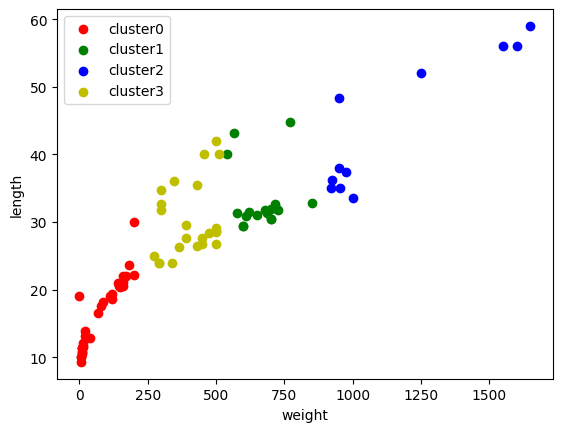

In [34]:
colors=['r','g','b','y','m']
for i in range(4):
    cluster_data=X[y_means==i]
    plt.scatter(cluster_data['Weight'],cluster_data['Length1'],c=colors[i],label=f"cluster{i}")
    plt.xlabel('weight')
    plt.ylabel('length')
    plt.legend()


In [113]:
def predict_cluster(weight,length):
    new_data=[[weight,length]]
    cluster=km.predict(new_data)
    return cluster[0]

In [114]:
new_fish_weight=290
new_fish_length=24
y_pred=predict_cluster(new_fish_weight,new_fish_length)
print(f"the fish belongs to cluster:{y_pred}")

the fish belongs to cluster:0


f:\aiml2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [39]:
from sklearn.metrics import silhouette_score

sil=silhouette_score(X,y_means)
print(sil)

0.5861767007233927


In [50]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(X)

In [63]:
from sklearn.cluster import KMeans
wcss=[]
sil1=[]
for i in range(2,5):
    km=KMeans(n_clusters=i,init='k-means++',random_state=0)
    y=km.fit_predict(x_scaled)
    wcss.append(km.inertia_)
    sil1.append(silhouette_score(x_scaled,y))
wcss

[3.5607780278810552, 1.843072566819313, 1.0706317963937957]

In [64]:
wcss=np.array(wcss)
wcss_scaled=np.round(scaler.fit_transform([wcss]),5)

sil1_scaled=scaler.fit_transform([sil1])
wcss_scaled

array([[0., 0., 0.]])

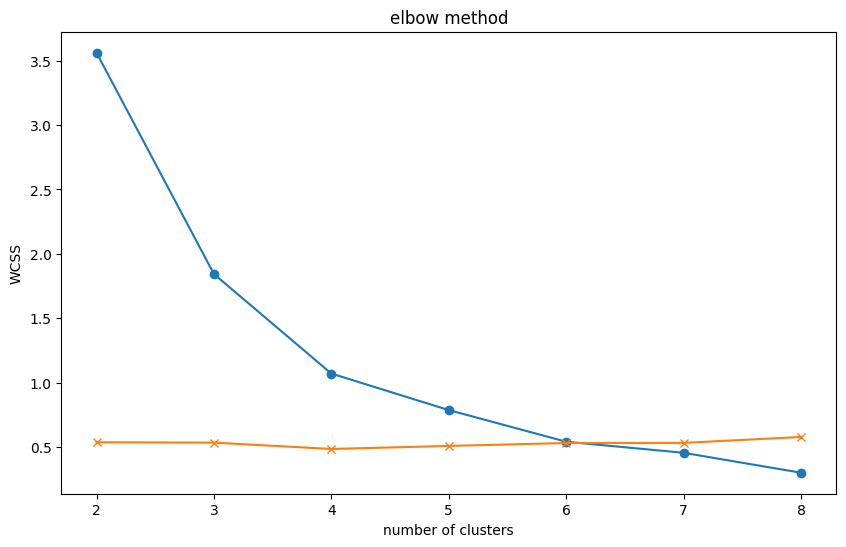

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(2,9),wcss,marker='o')
plt.plot(range(2,9),sil1,marker='x')
plt.title('elbow method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [42]:
sil1

[0.5789291618265734,
 0.6227439409522197,
 0.6212230159023358,
 0.5678382948854619,
 0.5960243748530935,
 0.5804509933324734,
 0.6526840718586628]

In [100]:
class kmeans_custom:
    def __init__(self,n_clusters=4,max_iter=1000,tol=0.0001):
        self.centroid=None
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.tol=tol
        self.labels_=None
    def fit(self,X):
        X = np.array(X)

        n_samples,n_features=X.shape
        random_indices=np.random.choice(n_samples,self.n_clusters,replace=False)
        self.centroid=X[random_indices]

        for i in range(self.max_iter):

            distance=self.compute_distance(X)
            labels=np.argmin(distance,axis=1)
            new_centroid=np.array([X[labels==j].mean(axis=0) for j in range(self.n_clusters)])
            diff=np.linalg.norm(self.centroid-new_centroid)

            if diff < self.tol:
                break
            self.centroid=new_centroid
            self.labels_=labels
        self.labels_=labels
    def predict(self,X):
        X = np.array(X)

        distance=self.compute_distance(X)
        return np.argmin(distance,axis=1)
    def compute_distance(self,X):
        X = np.array(X)

        return np.linalg.norm(X[:,np.newaxis]-self.centroid,axis=2)

In [69]:
X1=np.array(X)

In [108]:
km=kmeans_custom()
km.fit(X)
y_pred=km.predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0])

ValueError: x and y must be the same size

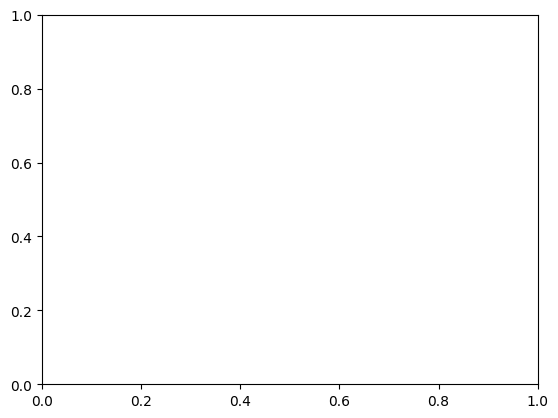

In [83]:
mod1=KMeans()
mod2=kmeans_custom()

mod1.fit(X1)
y_pred_lib=mod1.predict(X1)
mod2.fit(X1)
y_pred_custom=mod2.predict(X1)

plt.scatter(X1,y_pred_lib,label='library')
plt.scatter(X1,y_pred_custom,label='custom')
plt.xlabel('predictor')
plt.ylabel('predicted')
plt.legend()
plt.show()

In [84]:
data['cluster']=y_pred

In [85]:
colors=['r','g','b','y','m']
for i in range(4):
    cluster_data=X1[y_means==i]
    plt.scatter(cluster_data['Weight'],cluster_data['Length1'],c=colors[i],label=f"cluster{i}")
    plt.xlabel('weight')
    plt.ylabel('length')
    plt.legend()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [106]:
def predict_custom(weight,length):
    new_data=[weight,length]
    cluster=km.predict(new_data)
    return cluster

In [115]:
predict_cluster(290,24)

f:\aiml2\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


np.int32(0)

In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg=AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
y_hc=agg.fit_predict(X)
y_hc

,n_clusters,4
,metric,'euclidean'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'ward'
,distance_threshold,None
,compute_distances,False


In [ ]:
def predict_custom_agg(weight,length):
    new_data=[[weight,length]]
    cluster=agg.(new_data)
    return cluster[0]

In [131]:
predict_custom_agg(290,24)

ValueError: Found array with 1 sample(s) (shape=(1, 2)) while a minimum of 2 is required by AgglomerativeClustering.

In [135]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.3,min_samples=10)
db.fit(X)
labels=db.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

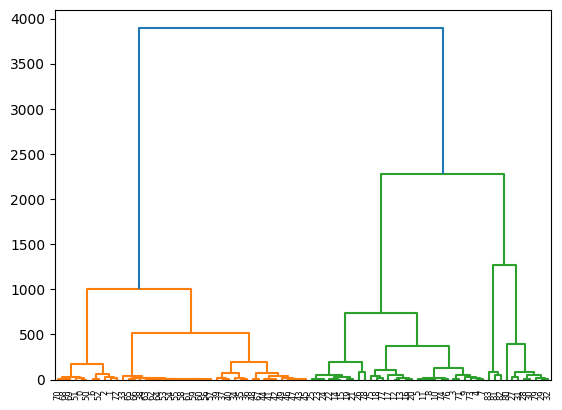

In [138]:
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
z=linkage(X,'ward')
dendrogram(z)
plt.show()

In [140]:
k = 2  # or 3, 4, 5...
labels = fcluster(z, k, criterion='maxclust')
labels

array([1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [141]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, labels)
print(f"Silhouette score for k={k}: {score:.3f}")


Silhouette score for k=2: 0.583


In [143]:
for k in range(2, 10):
    labels = fcluster(z, k, criterion='maxclust')
    score = silhouette_score(X, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")


k=2, Silhouette Score=0.583
k=3, Silhouette Score=0.599
k=4, Silhouette Score=0.616
k=5, Silhouette Score=0.555
k=6, Silhouette Score=0.596
k=7, Silhouette Score=0.631
k=8, Silhouette Score=0.636
k=9, Silhouette Score=0.662
